In [4]:
import pandas as pd

In [5]:
df1=pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")
df2=pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2010-2011")

In [6]:
df=df1.append(df2)

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [10]:
df=df.dropna()

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
df=df[df['Price']>0]
df=df[df['Quantity']>0]

In [13]:
customers=df['Customer ID'].unique()

In [14]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['quarter'] = pd.PeriodIndex(df.InvoiceDate, freq='Q')
df['month'] = pd.PeriodIndex(df.InvoiceDate, freq='M')
df['sale_amount'] = df['Quantity']*df['Price']

In [15]:
dfc=df.groupby(['Customer ID','month']).agg(total_sales = ('sale_amount', 'sum'),invoice_count = ('Invoice', 'count')).reset_index()

In [16]:
a=list(set(dfc['month'].unique()))
a.sort()

In [21]:
b=[p.strftime('%Y-%m') for p in a]

print(b)

['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']


In [22]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,quarter,month,sale_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009Q4,2009-12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009Q4,2009-12,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009Q4,2009-12,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009Q4,2009-12,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009Q4,2009-12,30.0


In [23]:

result_df = df.groupby(by='Customer ID',as_index=False).agg(last_invoice_date = ('InvoiceDate', 'max'),total_monthly_sales=('sale_amount',sum),
        monetary=('month',pd.Series.nunique))
result_df.columns = ['Customer ID', 'last_invoice_date','monetary','frequency']
recent_date = df['InvoiceDate'].max()
lowest_date = df['InvoiceDate'].min()
print(recent_date,lowest_date)
result_df['recency'] = result_df['last_invoice_date'].apply(
    lambda x: int(((recent_date -x).days/30)))
result_df

2011-12-09 12:50:00 2009-12-01 07:45:00


,Customer ID,last_invoice_date,monetary,frequency,recency
0,12346.0,2011-01-18 10:01:00,77556.46,5,10
1,12347.0,2011-12-07 15:52:00,5633.32,8,0
2,12348.0,2011-09-25 13:13:00,2019.40,5,2
3,12349.0,2011-11-21 09:51:00,4428.69,4,0
4,12350.0,2011-02-02 16:01:00,334.40,1,10
...,...,...,...,...,...
5873,18283.0,2011-12-06 12:02:00,2736.65,14,0
5874,18284.0,2010-10-04 11:33:00,461.68,1,14
5875,18285.0,2010-02-17 10:24:00,427.00,1,22
5876,18286.0,2010-08-20 11:57:00,1296.43,2,15


/Users/dp/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dp/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='monetary', ylabel='Density'>

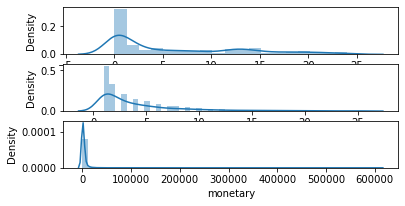

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(4, 1, 1); sns.distplot(result_df['recency'])

plt.subplot(4, 1, 2); sns.distplot(result_df['frequency'])
plt.subplot(4, 1, 3); sns.distplot(result_df['monetary'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9bb182580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9bb182ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9bb1821f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9bb153400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9bb153790>],
 'means': []}

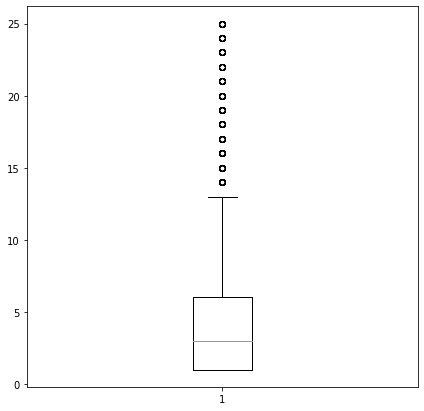

In [25]:
fig = plt.figure(figsize =(7, 7))
data=result_df["frequency"]
plt.boxplot(data)
